## 1- Import Libraries

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## 2- Read Dataset

In [3]:
df = pd.read_csv("spam_text_message_data.csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
df["Category"].replace({'ham': 0, 'spam': 1}, inplace=True)
print(df.head(10))

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
5         1  FreeMsg Hey there darling it's been 3 week's n...
6         0  Even my brother is not like to speak with me. ...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...


C:\Users\Asus\AppData\Local\Temp\ipykernel_16028\1491857457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace({'ham': 0, 'spam': 1}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16028\1491857457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"].r

## 3- Gain Insight from Data

In [ ]:
data = {'category': ['spam', 'ham'],
        'number': [len(df.loc[df.Category==1]), len(df.loc[df.Category==0])]
        }
                         
df_count = pd.DataFrame(data,columns=['category', 'number'])
print (df_count)

  category  number
0     spam     747
1      ham    4825


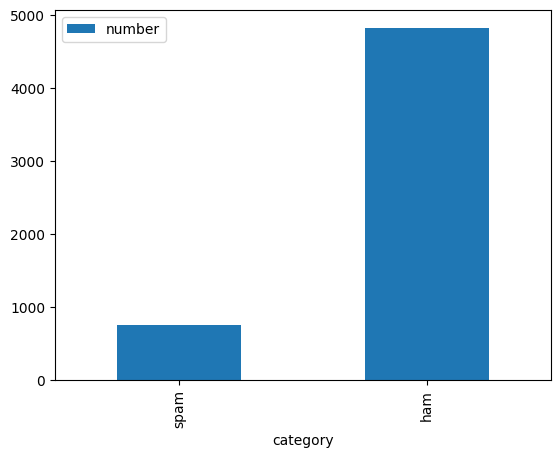

In [17]:
df_count.plot(x='category', y='number', kind = 'bar')
plt.show()

## 4- Clean Data

In [ ]:
stemmer = PorterStemmer()
corpus = []

for w in range(len(df['Message'])):
    msg = df['Message'][w]
    msg = re.sub("[^a-zA-Z]", " ", msg)
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = " ".join(msg)
    corpus.append(msg)

## 5- Creat Word Vector

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(corpus)

# print(tf.vocabulary_)

X = tf.transform(corpus).toarray()
Y = df['Category']

## 6- Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

## 7- Train Model

In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

y_pred = model.predict(X_test)

## 8- Compute Metrics

In [12]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, y_pred)

print(confusion_m)

[[955   0]
 [ 34 126]]


## 9- Visulization

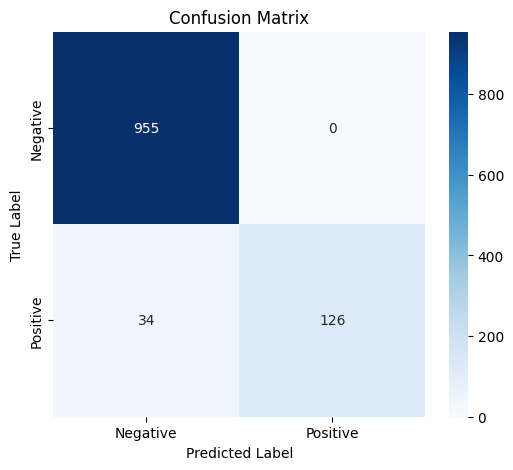

In [15]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 10- Model Evaluation Metrics

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print("acc", acc, "\n")
print("prec", prec, "\n")
print("rec", rec, "\n")

acc 0.9695067264573991 

prec 1.0 

rec 0.7875 

